In [118]:
import numpy as np # 数値解析パッケージのインポート
import cv2 # opencvのインポート
import matplotlib.pyplot as plt # matplotlib(描画用)
from google.colab import files
from google.colab.patches import cv2_imshow #cv2.imshow()の代わり
from google.colab import drive #google driveのマウント
drive.mount('/content/drive/')
%cd "/content/drive/My Drive/Colab Notebooks/"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks


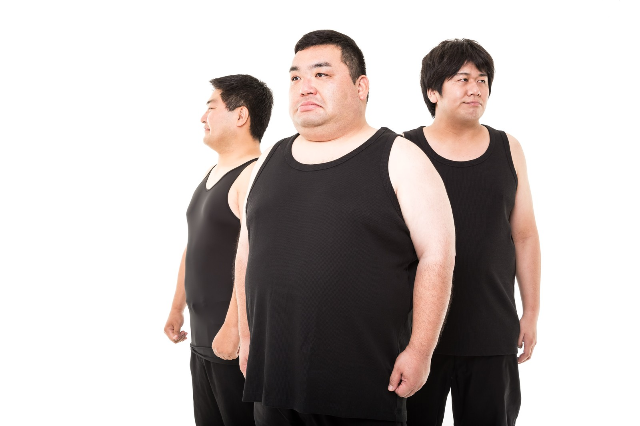

426
640


In [119]:
# from ぱくたそ (https://www.pakutaso.com/20150920253post-6016.html)

img=cv2.imread('./human.jpg')#画像の読み込み
height=img.shape[0]#画像サイズ
width=img.shape[1]
SCALE =0.4
imgq=cv2.resize(img,(int(width*SCALE),int(height*SCALE))) #1/10の縮小　（元の画像がおおきいので）
cv2_imshow(imgq)
print(imgq.shape[0])
print(imgq.shape[1])


imghls=cv2.cvtColor(imgq, cv2.COLOR_BGR2HLS)#BGRからHLS画像への変換
hls = cv2.split(imghls)#HLS画像を各成分に分解

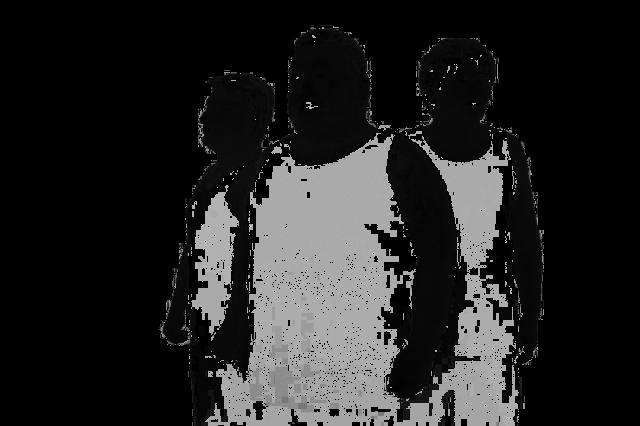

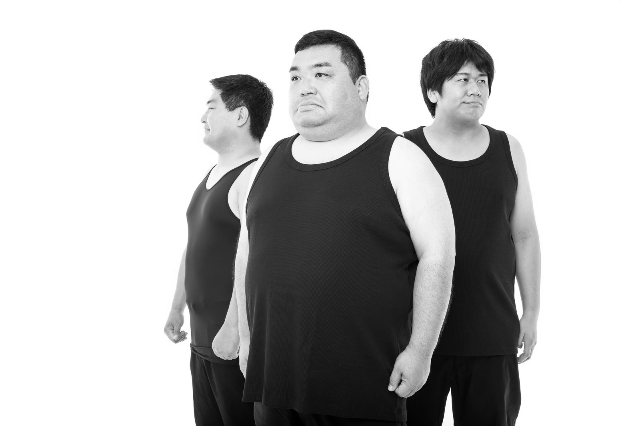

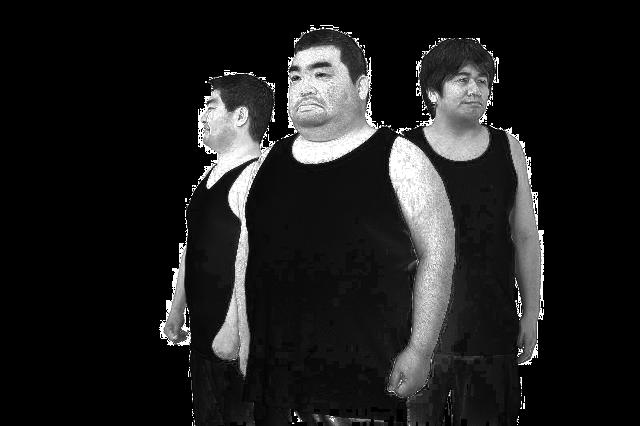

In [120]:
hue = hls[0] #色相
intensity = hls[1] #強度(輝度)
saturation = hls[2] #彩度
cv2_imshow(hue)
cv2_imshow(intensity)
cv2_imshow(saturation)

histgram of hue


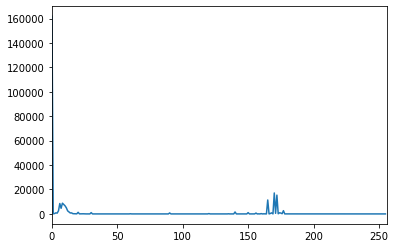

In [121]:
hist = cv2.calcHist([hue],[0],None,[256],[0,256])#　cv2.calcHist([image], channel, mask, # of bin, range)
print("histgram of hue")
plt.plot(hist) # プロット
plt.xlim([0,256])
plt.show()

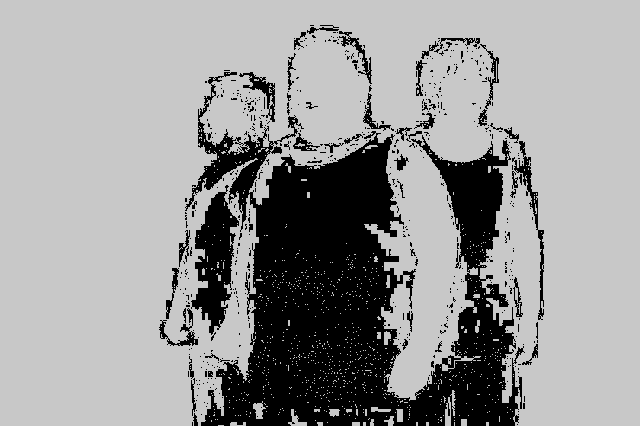

In [122]:
MAX=180 #肌色の範囲
MIN=12 #肌色の範囲
MASK=200


chroma_key_hue= np.zeros((imgq.shape[0],imgq.shape[1], 1), np.uint8)# 画像領域の準備
for i in range (imgq.shape[0]):
  for j in range (imgq.shape[1]):
    if (hue[i][j]>MAX) or (hue[i][j]<MIN):#MAX〜MINを0それ以外をMASKに2値化
      chroma_key_hue[i][j]= MASK
    else:
      chroma_key_hue[i][j]= 0

cv2_imshow(chroma_key_hue)


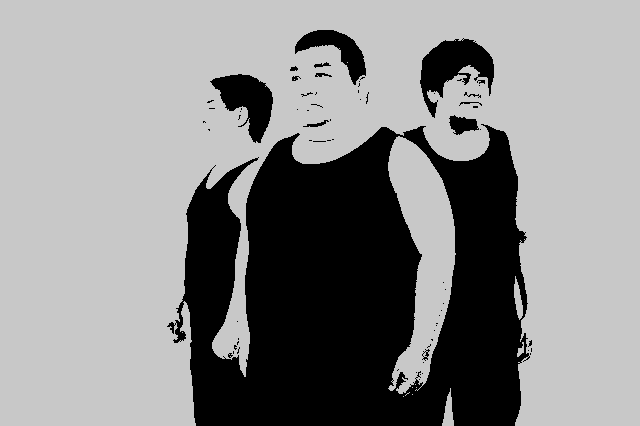

In [123]:
MAX=160


chroma_key_intensity = np.zeros((imgq.shape[0],imgq.shape[1], 1), np.uint8)
for i in range (imgq.shape[0]):
  for j in range (imgq.shape[1]):
    if (intensity[i][j]>MAX) :
      chroma_key_intensity[i][j]= MASK
    else:
      chroma_key_intensity[i][j]= 0

cv2_imshow(chroma_key_intensity)


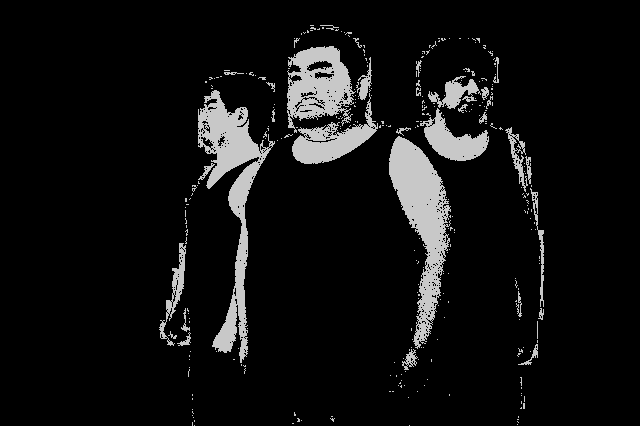

In [124]:
MAX=160


chroma_key_saturation = np.zeros((imgq.shape[0],imgq.shape[1], 1), np.uint8)
for i in range (imgq.shape[0]):
  for j in range (imgq.shape[1]):
    if (saturation[i][j]>MAX) :
      chroma_key_saturation[i][j]= MASK
    else:
      chroma_key_saturation[i][j]= 0

cv2_imshow(chroma_key_saturation)


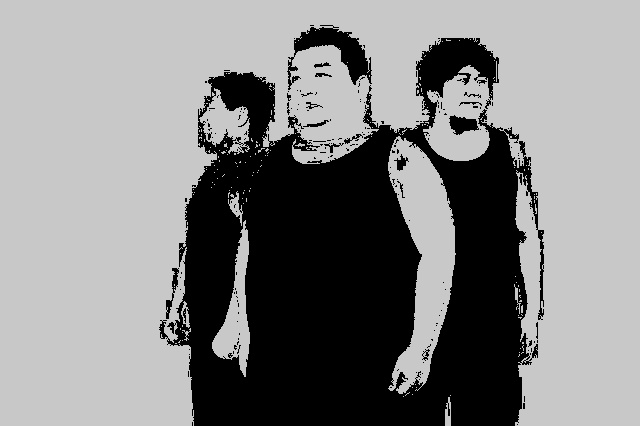

In [125]:
chroma_key = np.zeros((imgq.shape[0],imgq.shape[1], 1), np.uint8)
for i in range (imgq.shape[0]):
  for j in range (imgq.shape[1]):
    chroma_key[i][j] = MASK if (chroma_key_hue[i][j] * chroma_key_intensity[i][j]) else 0

cv2_imshow(chroma_key)

# まとめ

純粋に色相と強度のみで画像から顔の情報を抽出しようとした場合には、画像内に顔以外の肌要素が混在していると、顔のみを抽出することが難しくなる。
上記画像と抽出結果からも分かる通り、今回選択した画像には顔以外にも、首や腕などの、顔と色相が似通った要素が多く見られた。そのため、顔のみを区別して抽出することが難しかったと考えられる。また、通常の写真のように風景の中に人物が位置していれば、照明は上から当たることが多いという経験則に基づいて、画像内のintensityに重み付けを行うことも可能かもしれないが、本プログラムで用いている写真はスタジオで撮影されたと思われる、照明が全体に等しく当たっている画像であるため、それも難しかった。

# おまけ

他の画像でも試してみます。

使用する画像は上記の反省をもとに、腕などの肌色面積が大きすぎるものを避け、かつ通常の風景の中にいる人間を題材としたものにしました。

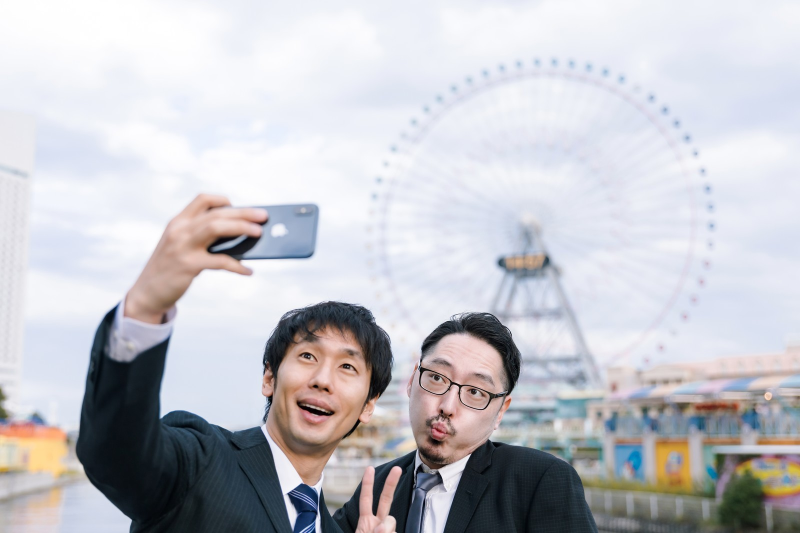

533
800


In [126]:
# from ぱくたそ (https://www.pakutaso.com/20190821218post-22465.html)

img=cv2.imread('./human2.jpg')#画像の読み込み
height=img.shape[0]#画像サイズ
width=img.shape[1]
SCALE =0.5
imgq=cv2.resize(img,(int(width*SCALE),int(height*SCALE))) #1/10の縮小　（元の画像がおおきいので）
cv2_imshow(imgq)
print(imgq.shape[0])
print(imgq.shape[1])


imghls=cv2.cvtColor(imgq, cv2.COLOR_BGR2HLS)#BGRからHLS画像への変換
hls = cv2.split(imghls)#HLS画像を各成分に分解

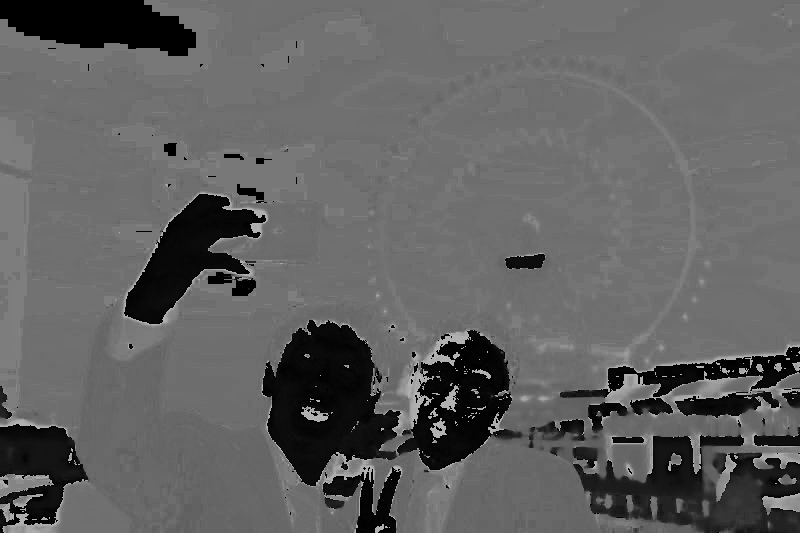

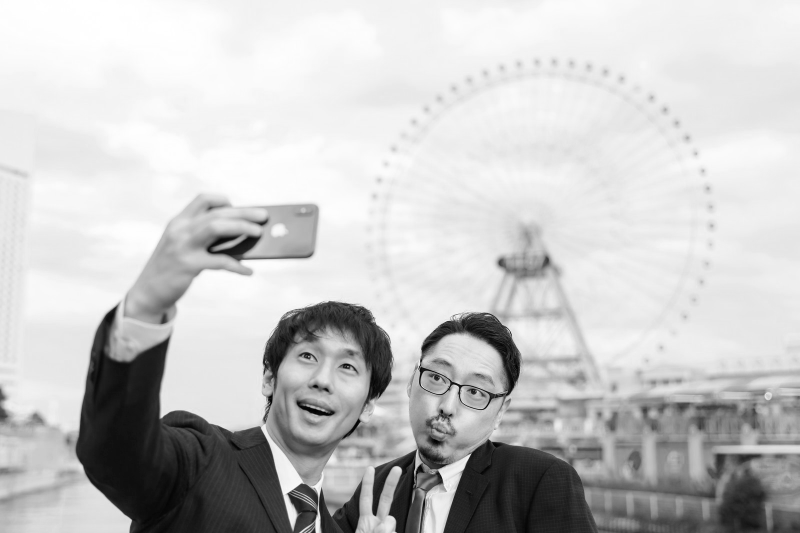

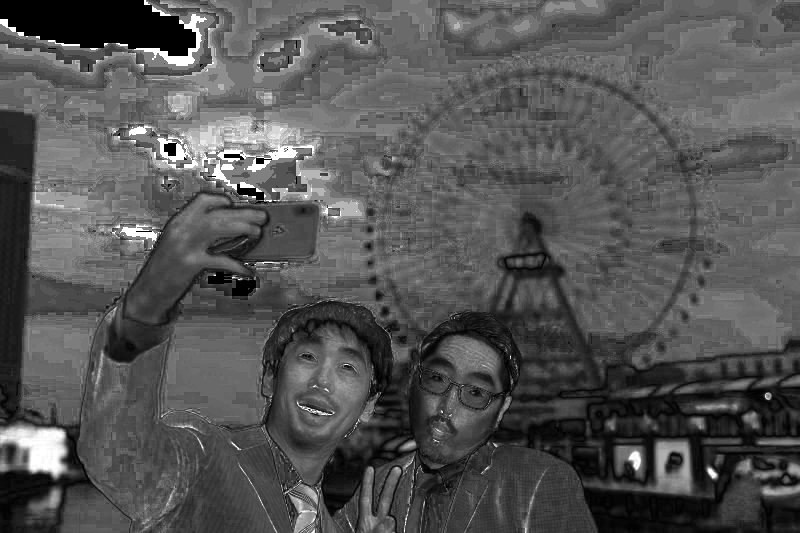

In [127]:
hue = hls[0] #色相
intensity = hls[1] #強度(輝度)
saturation = hls[2] #彩度
cv2_imshow(hue)
cv2_imshow(intensity)
cv2_imshow(saturation)

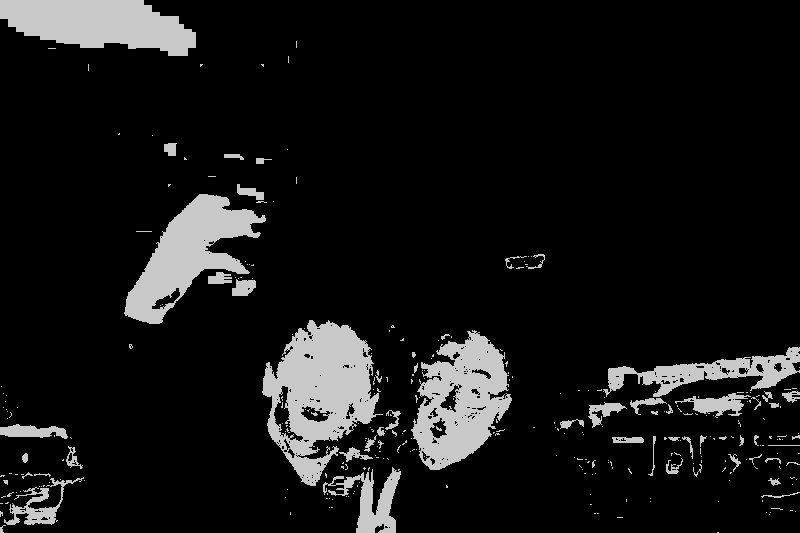

In [128]:
MAX=180
MIN=12
MASK=200


chroma_key_hue= np.zeros((imgq.shape[0],imgq.shape[1], 1), np.uint8)
for i in range (imgq.shape[0]):
  for j in range (imgq.shape[1]):
    if (hue[i][j]>MAX) or (hue[i][j]<MIN):
      chroma_key_hue[i][j]= MASK
    else:
      chroma_key_hue[i][j]= 0

cv2_imshow(chroma_key_hue)


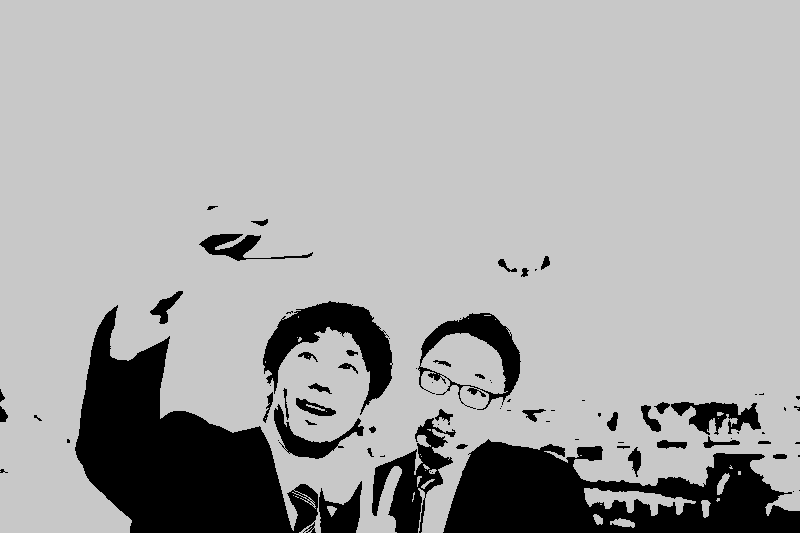

In [129]:
MAX=125


chroma_key_intensity = np.zeros((imgq.shape[0],imgq.shape[1], 1), np.uint8)
for i in range (imgq.shape[0]):
  for j in range (imgq.shape[1]):
    if (intensity[i][j]>MAX) :
      chroma_key_intensity[i][j]= MASK
    else:
      chroma_key_intensity[i][j]= 0

cv2_imshow(chroma_key_intensity)


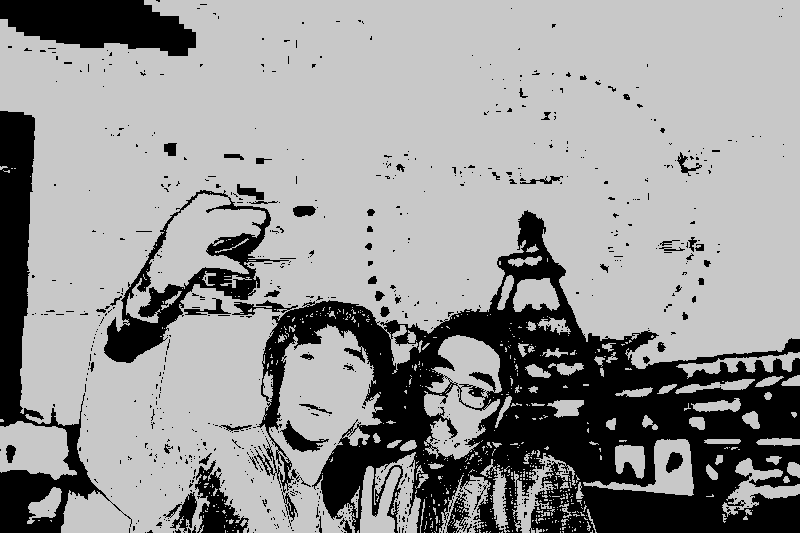

In [130]:
MAX=60


chroma_key_saturation = np.zeros((imgq.shape[0],imgq.shape[1], 1), np.uint8)
for i in range (imgq.shape[0]):
  for j in range (imgq.shape[1]):
    if (saturation[i][j]>MAX) :
      chroma_key_saturation[i][j]= MASK
    else:
      chroma_key_saturation[i][j]= 0

cv2_imshow(chroma_key_saturation)


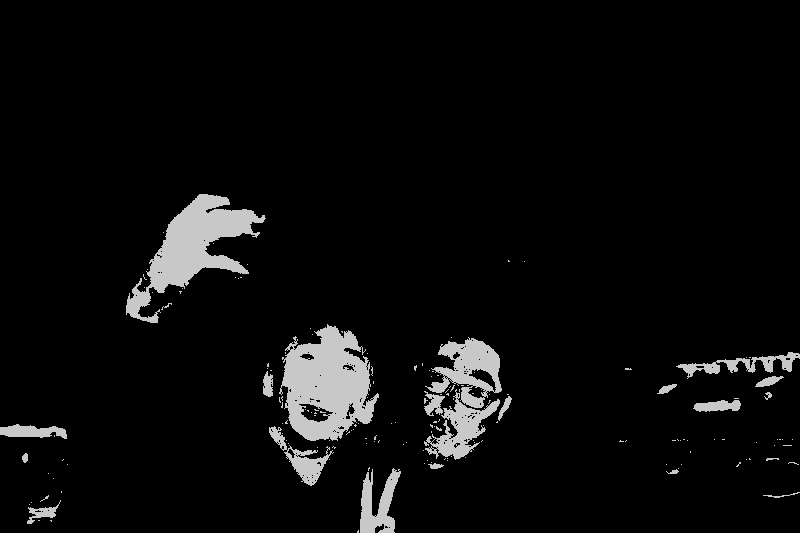

In [131]:
chroma_key = np.zeros((imgq.shape[0],imgq.shape[1], 1), np.uint8)
for i in range (imgq.shape[0]):
  for j in range (imgq.shape[1]):
    chroma_key[i][j] = MASK if (chroma_key_hue[i][j] * chroma_key_saturation[i][j]) else 0

cv2_imshow(chroma_key)

# 考察

上記のような写真で抽出を行なったところ、やはりある程度の顔領域の抽出は出来るが、肌色成分の似通っている手などを誤って抽出してしまうことがわかった。また、背景画像のうちの肌色の部分も抽出してしまっている。

このような誤った抽出を取り除くためには、やはり顔にあって他の肌色部分にはない特徴を取り入れる必要があるように感じられる。つまり、上記画像を見るとわかるように、顔のみに存在する三角形に配置された口・目を検出し、その周囲のみを抽出するようにするなどのの工夫が必要である。

以下、PDF出力用のコマンド

In [132]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
texlive is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [133]:
!jupyter nbconvert --to PDF "repo2"

[NbConvertApp] Converting notebook repo2 to PDF
[NbConvertApp] Support files will be in repo_files/
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Making directory ./repo_files
[NbConvertApp] Writing 45065 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u